In [3]:
# ! pip install --upgrade tensorflow==2.16.1


  Using cached tensorflow-2.16.1-cp39-cp39-win_amd64.whl.metadata (3.5 kB)
  Using cached tensorflow_intel-2.16.1-cp39-cp39-win_amd64.whl.metadata (5.0 kB)
  Using cached tensorboard-2.16.2-py3-none-any.whl.metadata (1.6 kB)
  Using cached keras-3.3.3-py3-none-any.whl.metadata (5.7 kB)
Using cached tensorflow-2.16.1-cp39-cp39-win_amd64.whl (2.1 kB)
Using cached tensorflow_intel-2.16.1-cp39-cp39-win_amd64.whl (376.9 MB)
Using cached keras-3.3.3-py3-none-any.whl (1.1 MB)
Using cached tensorboard-2.16.2-py3-none-any.whl (5.5 MB)
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.13.0
    Uninstalling tensorboard-2.13.0:
      Successfully uninstalled tensorboard-2.13.0
  Attempting uninstall: keras
    Found existing installation: keras 2.13.1
    Uninstalling keras-2.13.1:
      Successfully uninstalled keras-2.13.1
  Attempting uninstall: tensorflow-intel
    Found existing installation: tensorflow-intel 2.13.0
    Uninstalling tensorflow-intel-2.13.0:
  

  You can safely remove it manually.


In [50]:
import pandas as pd
import tensorflow as tf
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from sklearn.model_selection import train_test_split
from scipy.stats import zscore

In [51]:
print(tf.__version__)

2.13.0


In [52]:
data = pd.read_csv("convert_numeric.csv", delimiter=",")

In [53]:
data.head()

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,gender,marital_status,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,0,6,1,3,1169,4,1,4,1,3,...,2,67,1,1,2,1,1,1,1,1
1,2,48,3,3,5951,0,2,2,0,1,...,2,22,1,1,1,1,1,0,1,0
2,3,12,1,9,2096,0,3,2,1,3,...,2,49,1,1,1,3,2,0,1,1
3,0,42,3,7,7882,0,3,2,1,3,...,0,45,1,0,1,1,2,0,1,1
4,0,24,2,1,4870,0,2,3,1,3,...,3,53,1,0,2,1,2,0,1,0


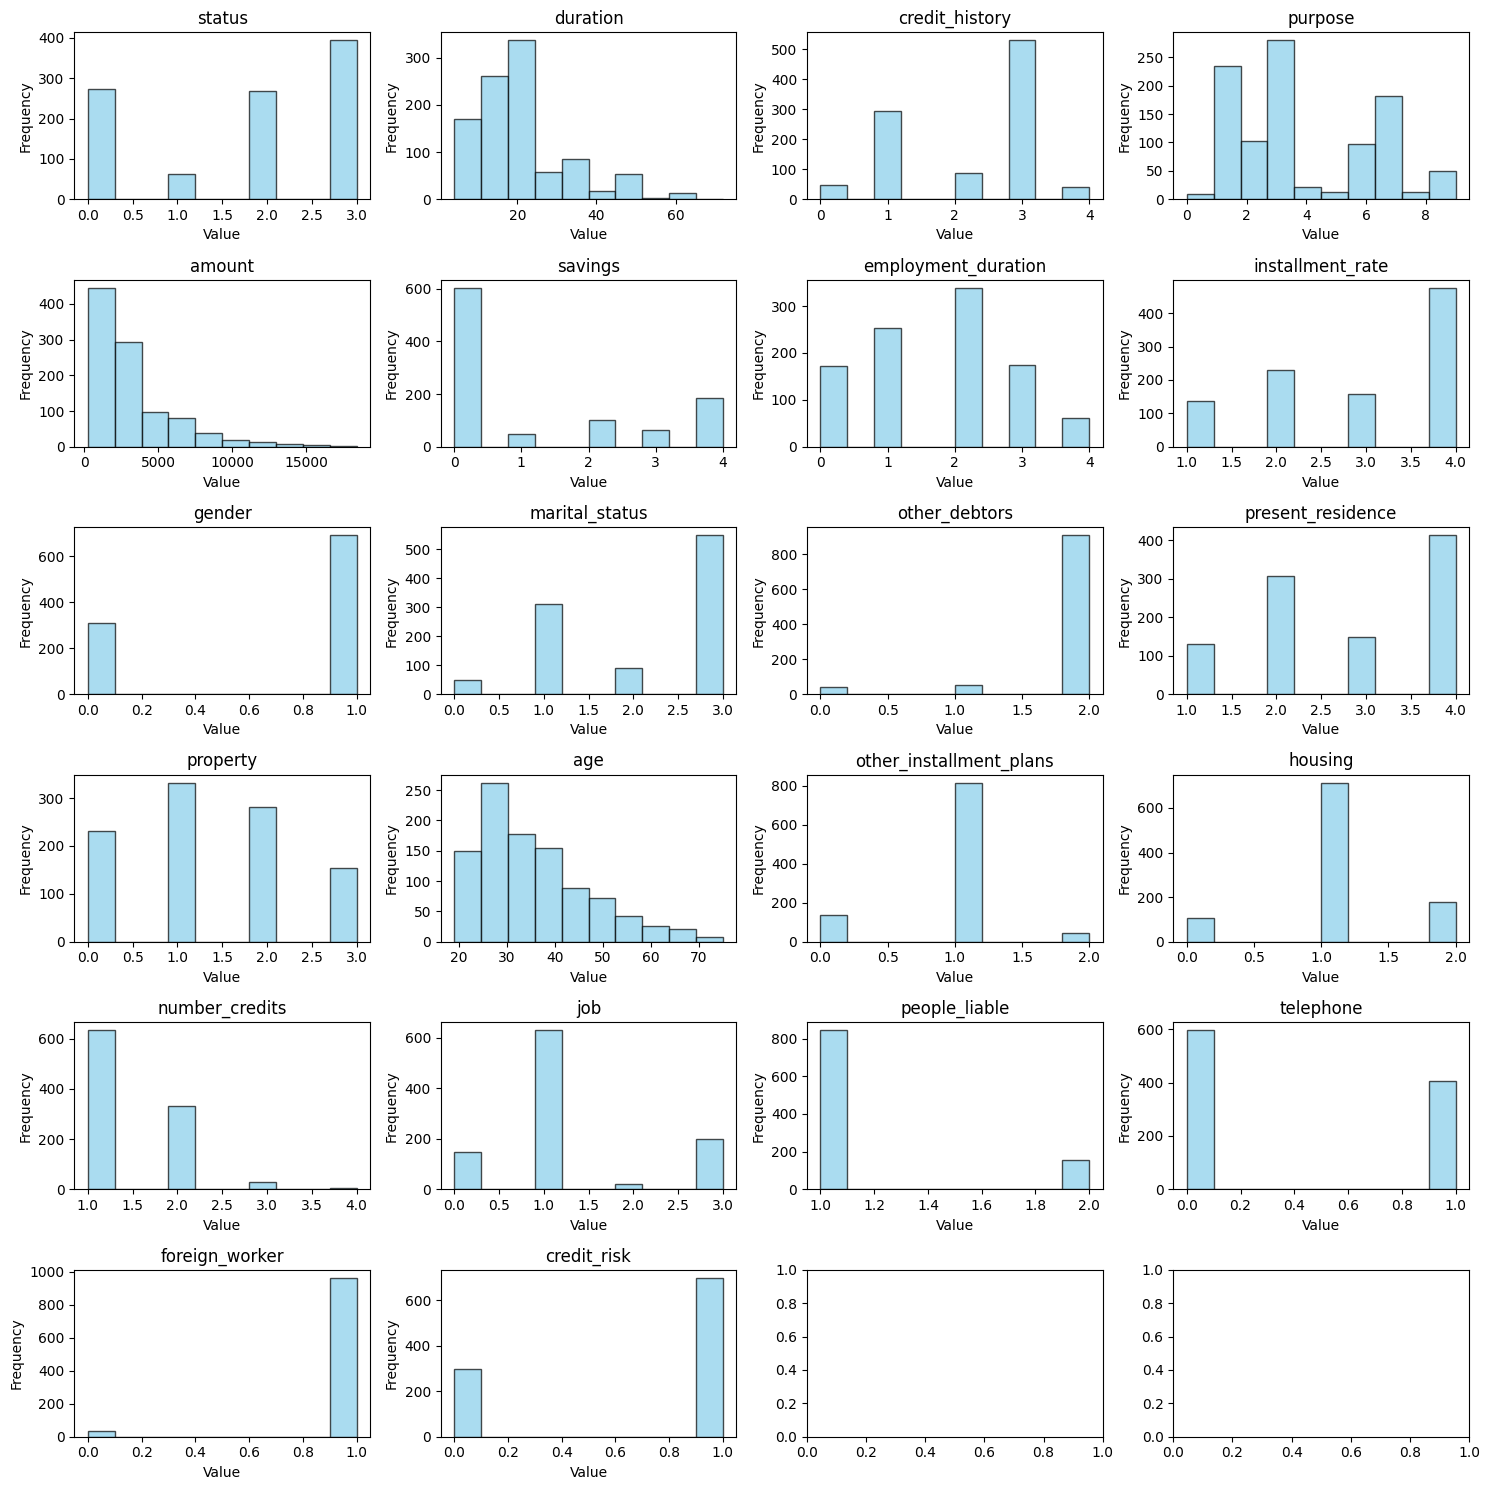

In [54]:
import matplotlib.pyplot as plt

# Assuming you have already loaded the data into 'data' using pd.read_csv

# Create a figure with subplots (6 rows, 4 columns)
fig, axes = plt.subplots(nrows=6, ncols=4, figsize=(15, 15))

# Flatten the 2D array of axes for easy iteration
axes = axes.flatten()

# Iterate over each column and create a histogram on a subplot
for i, column in enumerate(data.columns):
    axes[i].hist(data[column], bins=10, alpha=0.7, color='skyblue', edgecolor='black')
    axes[i].set_title(column)
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')

# Adjust layout to prevent overlapping titles
plt.tight_layout()

# Show the plot
plt.show()


In [55]:
X = data.drop('credit_risk', axis=1)  
y = data['credit_risk']

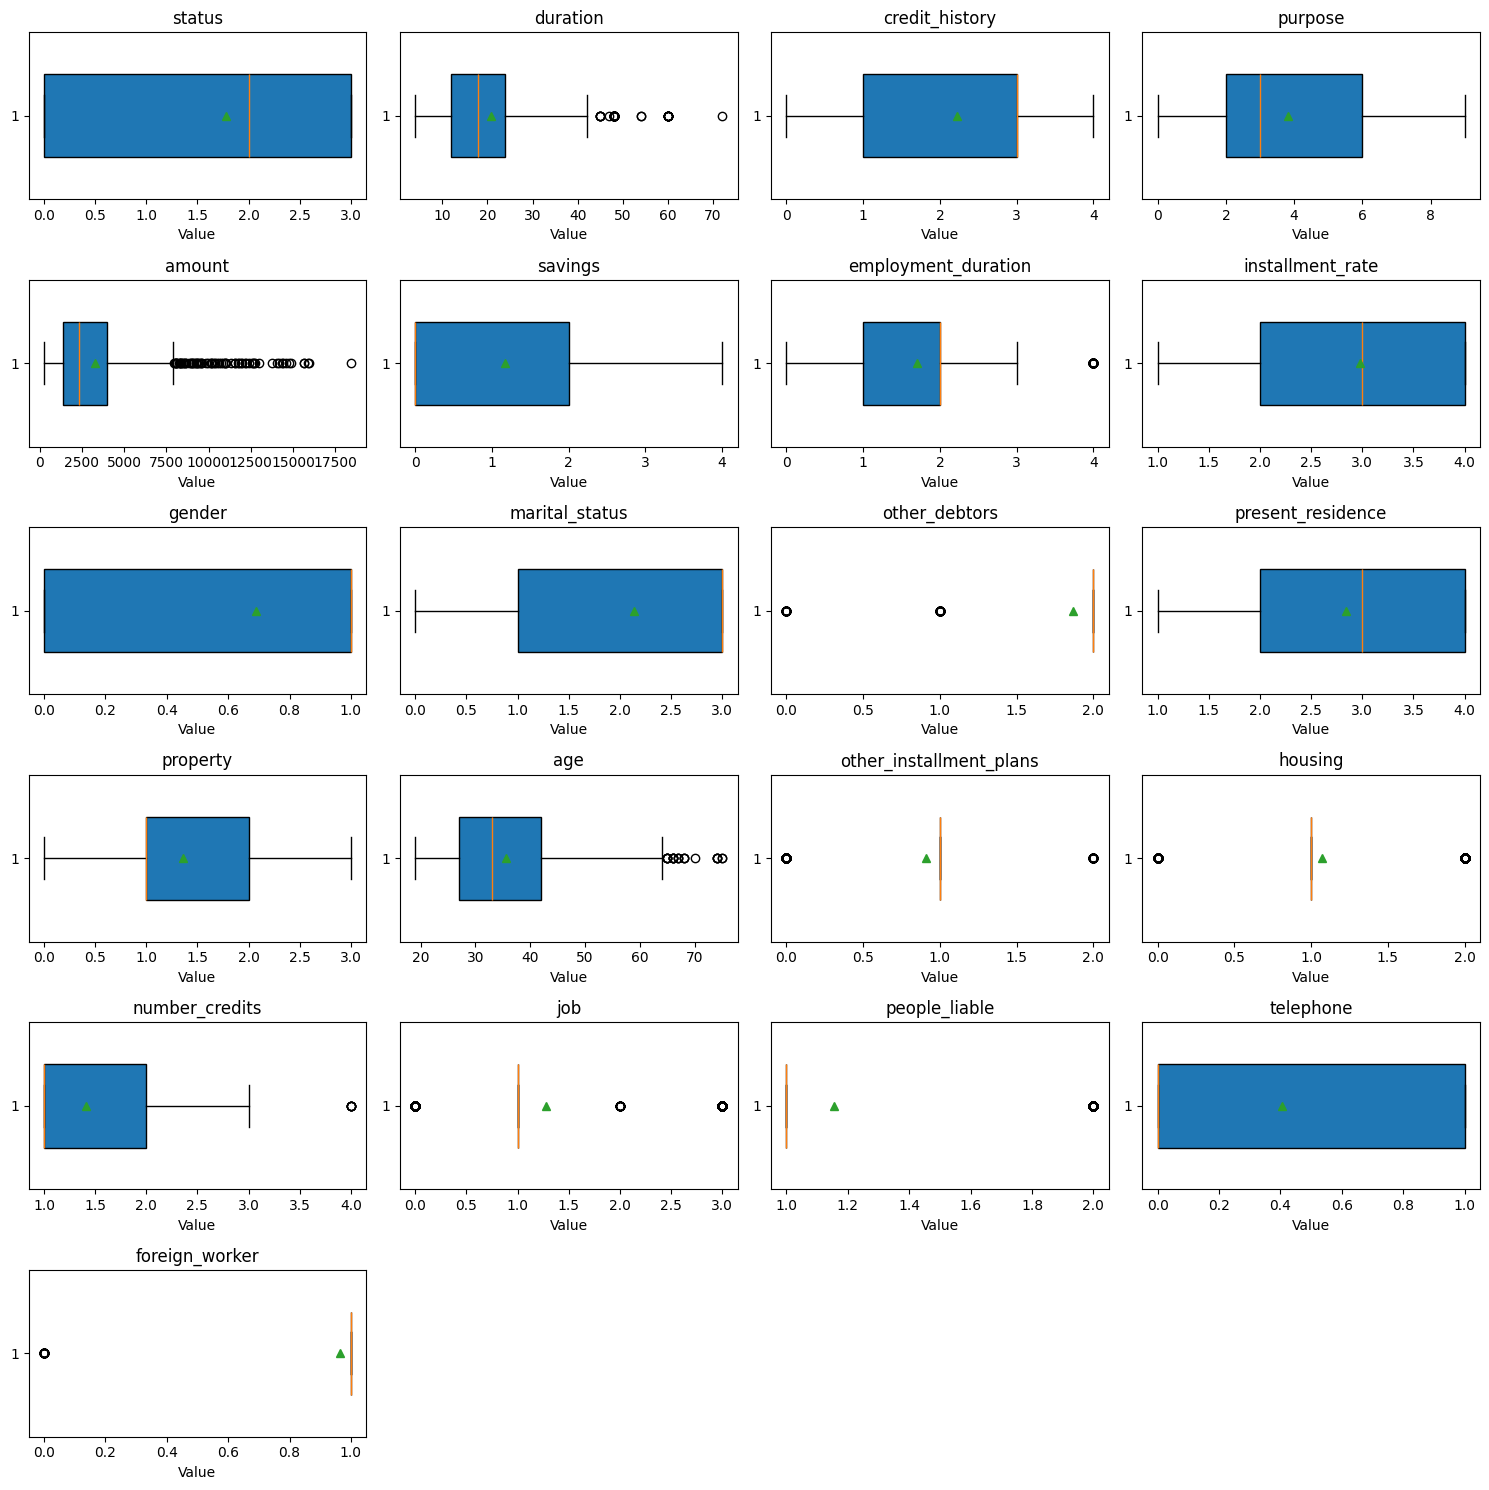

In [56]:
# Create a figure with subplots (6 rows, 4 columns)
fig, axes = plt.subplots(nrows=6, ncols=4, figsize=(15, 15))

# Flatten the 2D array of axes for easy iteration
axes = axes.flatten()

# Iterate over each column and create a boxplot on a subplot
for i, column in enumerate(X.columns):
    axes[i].boxplot(X[column].values, vert=False, patch_artist=True, showmeans=True, widths=0.5)  # Horizontal boxplot with mean marker
    axes[i].set_title(column)
    axes[i].set_xlabel('Value')

# Hide any unused subplots
for j in range(len(X.columns), len(axes)):
    fig.delaxes(axes[j])

# Adjust layout to prevent overlapping titles
plt.tight_layout()

# Show the plot
plt.show()

## Outlier Handling

In [57]:
from scipy.stats import zscore
import numpy as np

def handle_outliers_zscore(data, column, threshold=3):
    """
    Menangani outlier dalam DataFrame menggunakan Z-score.
    Outlier diidentifikasi berdasarkan ambang batas Z-score dan diganti dengan median nilai non-outlier.

    Args:
        df (pd.DataFrame): DataFrame yang akan diproses.
        column (str): Nama kolom yang akan diperiksa outlier.
        threshold (float, optional): Ambang batas Z-score untuk mendeteksi outlier (default=3).
    """

    # Menghitung Z-score
    z_scores = zscore(data[column])

    # Mengidentifikasi outlier berdasarkan ambang batas Z-score
    outliers = (z_scores < -threshold) | (z_scores > threshold)

    # Menampilkan jumlah outlier yang terdeteksi
    print(f"{column}: {np.sum(outliers)} outliers detected using Z-score")

    # Mengganti outlier dengan nilai median non-outlier
    if np.sum(~outliers) > 0:  # Memastikan ada data non-outlier yang cukup untuk menghitung median
        median_value = data.loc[~outliers, column].median()
        data.loc[outliers, column] = median_value
    else:
        print(f"Warning: Tidak ada cukup data non-outlier untuk mengganti outlier pada kolom {column}")

# Tentukan kolom yang akan diperiksa
columns_with_outliers = ['duration', 'amount', 'installment_rate', 'age', 'number_credits', 'people_liable']

# Terapkan penanganan outlier untuk setiap kolom yang ditentukan
for column in columns_with_outliers:
    handle_outliers_zscore(data, column)

# Opsional: Memeriksa kolom lain yang berpotensi memiliki outlier (other_debtors, property)
other_columns_with_possible_outliers = ['other_debtors', 'property']
for column in other_columns_with_possible_outliers:
    if data[column].dtype.kind in 'iufc':  # Periksa apakah kolom numerik
        handle_outliers_zscore(data, column)

# Menampilkan statistik deskriptif DataFrame setelah penanganan outlier
print(data.describe())


duration: 14 outliers detected using Z-score
amount: 25 outliers detected using Z-score
installment_rate: 0 outliers detected using Z-score
age: 7 outliers detected using Z-score
number_credits: 6 outliers detected using Z-score
people_liable: 0 outliers detected using Z-score
other_debtors: 41 outliers detected using Z-score
property: 0 outliers detected using Z-score
           status     duration  credit_history      purpose     amount  \
count  1000.00000  1000.000000     1000.000000  1000.000000   1000.000   
mean      1.78300    20.303000        2.219000     3.823000   2983.278   
std       1.22777    11.075552        1.064035     2.527461   2254.191   
min       0.00000     4.000000        0.000000     0.000000    250.000   
25%       0.00000    12.000000        1.000000     2.000000   1365.500   
50%       2.00000    18.000000        3.000000     3.000000   2255.000   
75%       3.00000    24.000000        3.000000     6.000000   3777.750   
max       3.00000    54.000000      

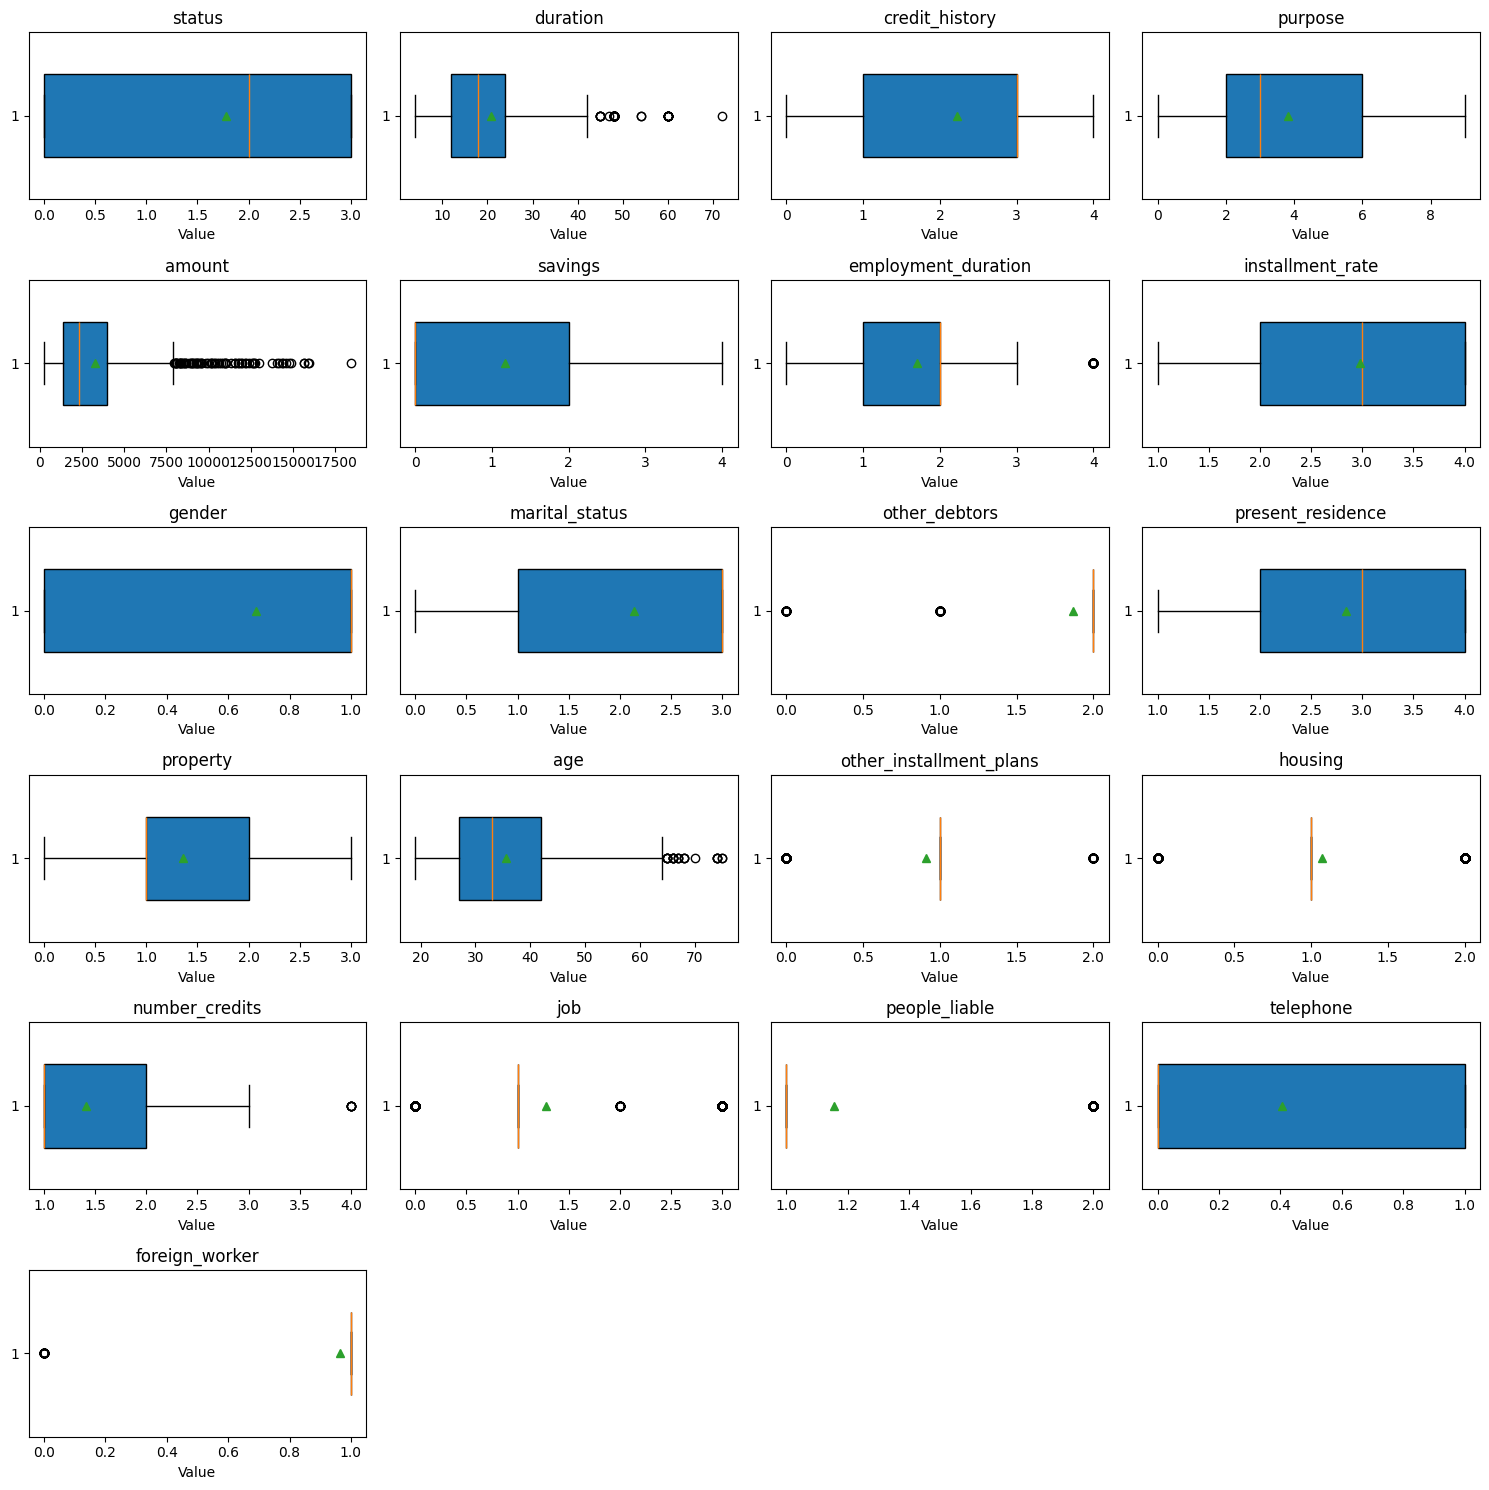

In [58]:
# Create a figure with subplots (6 rows, 4 columns)
fig, axes = plt.subplots(nrows=6, ncols=4, figsize=(15, 15))

# Flatten the 2D array of axes for easy iteration
axes = axes.flatten()

# Iterate over each column and create a boxplot on a subplot
for i, column in enumerate(X.columns):
    axes[i].boxplot(X[column].values, vert=False, patch_artist=True, showmeans=True, widths=0.5)  # Horizontal boxplot with mean marker
    axes[i].set_title(column)
    axes[i].set_xlabel('Value')

# Hide any unused subplots
for j in range(len(X.columns), len(axes)):
    fig.delaxes(axes[j])

# Adjust layout to prevent overlapping titles
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
# Reshape X for the CNN: (samples, time steps, features)
X = X.reshape(X.shape[0], X.shape[1], 1)  # Make it 3D

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the CNN model
model = Sequential([
    Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    Conv1D(filters=64, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')  
])

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) 

# Train the model
model.fit(X_train, y_train, epochs=15, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/15


c:\Users\fajar\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.6250 - loss: 0.6509 - val_accuracy: 0.7050 - val_loss: 0.6076
Epoch 2/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6816 - loss: 0.6321 - val_accuracy: 0.7050 - val_loss: 0.6081
Epoch 3/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6764 - loss: 0.6345 - val_accuracy: 0.7050 - val_loss: 0.6043
Epoch 4/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7093 - loss: 0.5986 - val_accuracy: 0.7050 - val_loss: 0.6054
Epoch 5/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7057 - loss: 0.6000 - val_accuracy: 0.7050 - val_loss: 0.5971
Epoch 6/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6945 - loss: 0.6014 - val_accuracy: 0.7050 - val_loss: 0.5882
Epoch 7/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6894 - loss: 0.5955 - val_accuracy: 0.7000 - val_loss: 0.5849
Epoch 8/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6841 - loss: 0.5897 - val_accuracy: 0.7050 - val_loss: 0.5704
Ep

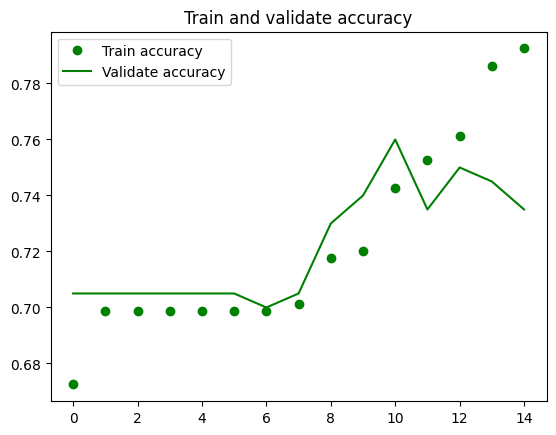

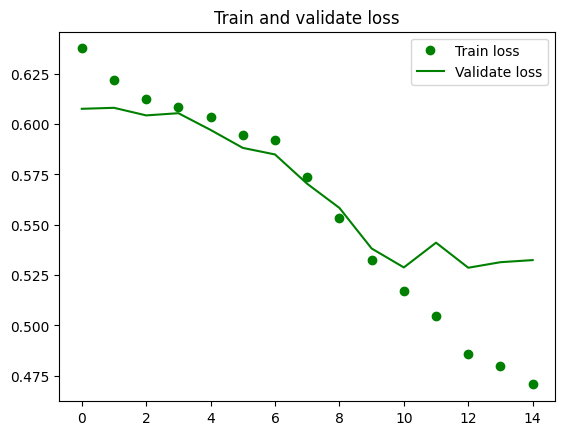

In [ ]:
acc = model.history.history['accuracy']                          
val_acc =  model.history.history['val_accuracy']
loss =  model.history.history['loss']
val_loss =  model.history.history['val_loss']

plt.plot( acc, 'go', label='Train accuracy')
plt.plot( val_acc, 'g', label='Validate accuracy')
plt.title('Train and validate accuracy')
plt.legend()                                            

plt.figure()

plt.plot( loss, 'go', label='Train loss')
plt.plot( val_loss, 'g', label='Validate loss')
plt.title('Train and validate loss')
plt.legend()

plt.show() 